In [6]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import configparser, os



In [143]:
PLOT_Q_DIR = 'plots/q'
os.makedirs(PLOT_Q_DIR, exist_ok=True)


dir_bd = '../experiments/output/%s/blockdude/%s'
dir_gw = '../experiments/output/%s/gridworld/%s'
figsave_all = False

## Plotting Q experiments
    
   

In [131]:
config = configparser.ConfigParser()

def reload_tracker():
    config.read_file(open('../experiments/tracker.ini'))
    dConfig = config['default']
    return dConfig


In [132]:
def plot_bdq_alpha(df, name='dsname', short_name='shortname', figsave=False):
        
    fig1, ax1 = plt.subplots(1, 1, figsize=(5,3))

    ax1.plot( df['run'], df['convergedAt'], label='iterations to converge')
    ax1.set_xlabel('Learning rate $\\alpha$')

    ax1.set_ylabel('converged at episode')
    ax1.set_title(f"Convergence by learning rate $\\alpha$\n{name}")
    
    ax2 = ax1.twinx()
    ax2.plot(df['run'], df['totalRewards'], linestyle='--', color='purple', linewidth=0.75, label='total rewards')
    ax2.set_ylabel('Total Rewards', color='purple' )
    ax2.tick_params('y', colors='purple')
   
    ax1.legend()
    ax2.legend()


    if figsave:
        fig1.savefig('plots/q/q_alpha_%s_results.png'%short_name, bbox_inches='tight')
        plt.close(fig=fig1)
        
    else:
        plt.show()

In [133]:
def plot_bdq_episode_rewards(data, name='dsname', short_name='shortname', figsave=False):
        
    fig1, ax1 = plt.subplots(1, 1, figsize=(5,3))

    for a,df in data:
        ax1.scatter( df['iter'], df['rewards'], label=a, marker='+', linewidth=0.5)
    ax1.set_xlabel('episode')

    ax1.set_ylabel('cumulative rewards')
    ax1.set_title(f"Rewards by episode\n{name}")
    
    ax1.legend()


    if figsave:
        fig1.savefig('plots/q/q_by_episode_%s_results.png'%short_name, bbox_inches='tight')
        plt.close(fig=fig1)
        
    else:
        plt.show()

RUN BD-Q ID: 28035656


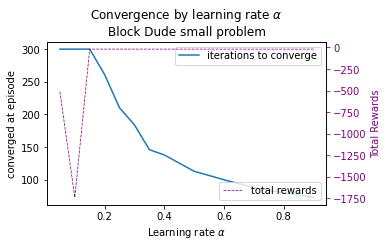

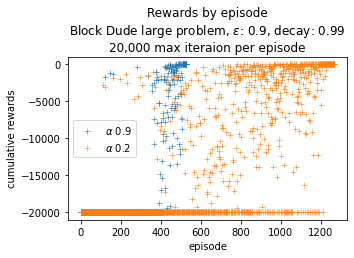

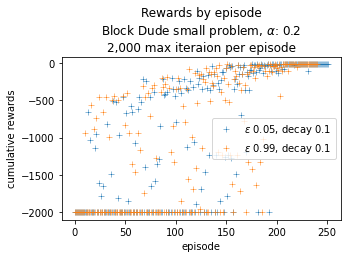

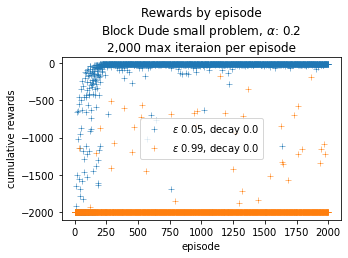

In [144]:
dConfig = reload_tracker()
bd_q = 'myq-bd'
bdq_exp_id = dConfig[bd_q]

print(f"RUN BD-Q ID: {bdq_exp_id}")


filename = 'q_sm_bd_alpha_result.csv'
pd_alpha_q =  pd.read_csv(dir_bd%(bd_q+'-'+bdq_exp_id, filename)) 
#     print(dir_bd%(bdname_sm+'-'+bdsm_exp_id, filename))

plot_bdq_alpha(pd_alpha_q, "Block Dude small problem", bd_q, figsave=figsave_all) 


file_infos = [(0.90,'q_lrg_bd_alpha0.90-00.csv'),(0.20,'q_lrg_bd_alpha0.20-00.csv')]
plot_infos = []
for alpha, filename in file_infos:
    pd_alpha_q_episode =  pd.read_csv(dir_bd%(bd_q+'-'+bdq_exp_id, filename)) 
    plot_infos.append((f'$\\alpha$ {alpha}', pd_alpha_q_episode))
plot_bdq_episode_rewards(plot_infos,"Block Dude large problem, $\epsilon$: 0.9, decay: 0.99\n20,000 max iteraion per episode", bd_q+'r1', figsave=figsave_all)


file_infos = [(0.05, 0.1,'q_sm_bd_ep0.05-0.10-00.csv'),
              (0.99, 0.1,'q_sm_bd_ep0.99-0.10-00.csv')]
              
plot_infos = []
for ep, decay, filename in file_infos:
    pd_alpha_q_episode =  pd.read_csv(dir_bd%(bd_q+'-'+bdq_exp_id, filename)) 
    plot_infos.append((f'$\epsilon$ {ep}, decay {decay}', pd_alpha_q_episode))
plot_bdq_episode_rewards(plot_infos,"Block Dude small problem, $\\alpha$: 0.2\n2,000 max iteraion per episode", bd_q+'r2', figsave=figsave_all)

file_infos = [(0.05, 0.0,'q_sm_bd_ep0.05-0.00-00.csv'),
              (0.99, 0.0,'q_sm_bd_ep0.99-0.00-00.csv')]
plot_infos = []

for ep, decay, filename in file_infos:
    pd_alpha_q_episode =  pd.read_csv(dir_bd%(bd_q+'-'+bdq_exp_id, filename)) 
    plot_infos.append((f'$\epsilon$ {ep}, decay {decay}', pd_alpha_q_episode))
plot_bdq_episode_rewards(plot_infos,"Block Dude small problem, $\\alpha$: 0.2\n2,000 max iteraion per episode", bd_q+'r3', figsave=figsave_all)




RUN GW-Q ID: 28103535


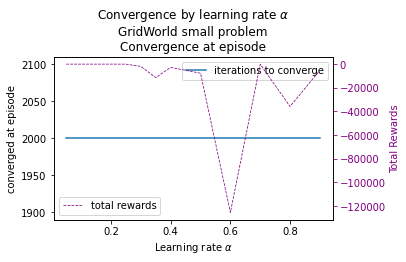

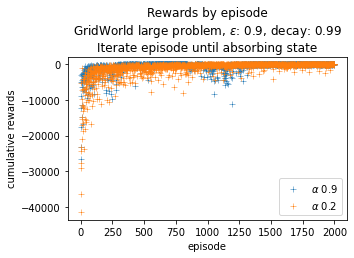

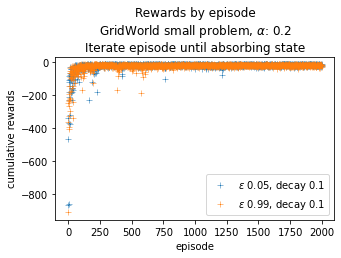

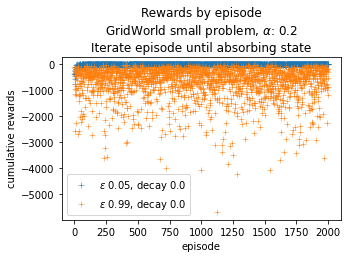

In [145]:
dConfig = reload_tracker()
gw_q = 'myq-gw'
gwq_exp_id = dConfig[gw_q]

print(f"RUN GW-Q ID: {gwq_exp_id}")


filename = 'q_sm_gw_alpha_result.csv'
pd_alpha_q =  pd.read_csv(dir_gw%(gw_q+'-'+gwq_exp_id, filename)) 

plot_bdq_alpha(pd_alpha_q, "GridWorld small problem\nConvergence at episode", gw_q, figsave=figsave_all) 


file_infos = [(0.90,'q_lrg_gw_alpha0.90-00.csv'),(0.20,'q_lrg_gw_alpha0.20-00.csv')]
plot_infos = []
for alpha, filename in file_infos:
    pd_alpha_q_episode =  pd.read_csv(dir_gw%(gw_q+'-'+gwq_exp_id, filename)) 
    plot_infos.append((f'$\\alpha$ {alpha}', pd_alpha_q_episode))
plot_bdq_episode_rewards(plot_infos,"GridWorld large problem, $\epsilon$: 0.9, decay: 0.99\nIterate episode until absorbing state", gw_q+'r1', figsave=figsave_all)


file_infos = [(0.05, 0.1,'q_sm_gw_ep0.05-0.10-00.csv'),
              (0.99, 0.1,'q_sm_gw_ep0.99-0.10-00.csv')]
              
plot_infos = []
for ep, decay, filename in file_infos:
    pd_alpha_q_episode =  pd.read_csv(dir_gw%(gw_q+'-'+gwq_exp_id, filename)) 
    plot_infos.append((f'$\epsilon$ {ep}, decay {decay}', pd_alpha_q_episode))
plot_bdq_episode_rewards(plot_infos,"GridWorld small problem, $\\alpha$: 0.2\nIterate episode until absorbing state", gw_q+'r2', figsave=figsave_all)

file_infos = [(0.05, 0.0,'q_sm_gw_ep0.05-0.00-00.csv'),
              (0.99, 0.0,'q_sm_gw_ep0.99-0.00-00.csv')]
plot_infos = []

for ep, decay, filename in file_infos:
    pd_alpha_q_episode =  pd.read_csv(dir_gw%(gw_q+'-'+gwq_exp_id, filename)) 
    plot_infos.append((f'$\epsilon$ {ep}, decay {decay}', pd_alpha_q_episode))
plot_bdq_episode_rewards(plot_infos,"GridWorld small problem, $\\alpha$: 0.2\nIterate episode until absorbing state", gw_q+'r3', figsave=figsave_all)




In [146]:
def plot_best_episode_rewards(data,df, name='dsname', short_name='shortname', figsave=False):
        
    fig1, ax1 = plt.subplots(1, 1, figsize=(5,3))

    for ep in data:
        df_f = df[df['run']== ep]
        ax1.plot( df_f['run2'], df_f['totalRewards'], label=f'$\epsilon$ {ep:.2}', marker='+', linewidth=0.75)
    ax1.set_xlabel('decay')

    ax1.set_ylabel('total rewards')
    ax1.set_title(f"Rewards by decay for $\epsilon$ \n{name}")
    
    ax1.legend()


    if figsave:
        fig1.savefig('plots/q/q_by_ep_decay_%s_results.png'%short_name, bbox_inches='tight')
        plt.close(fig=fig1)
        
    else:
        plt.show()

RUN GW-Q ID: 28103535


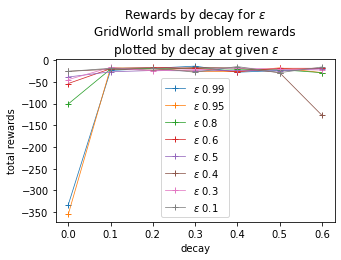

In [147]:
dConfig = reload_tracker()
gw_q = 'myq-gw'
gwq_exp_id = dConfig[gw_q]

print(f"RUN GW-Q ID: {gwq_exp_id}")

filename = 'q_sm_gw_ep_result.csv'
df_ep_decay = pd.read_csv(dir_gw%(gw_q+'-'+gwq_exp_id, filename)) 
plot_infos_ep = [0.99,0.95,0.80, 0.60, 0.5, 0.4, 0.3, 0.1]
              

plot_best_episode_rewards(plot_infos_ep, df_ep_decay,"GridWorld small problem rewards\n plotted by decay at given $\epsilon$", gw_q, figsave=figsave_all)


RUN BD-Q ID: 28035656


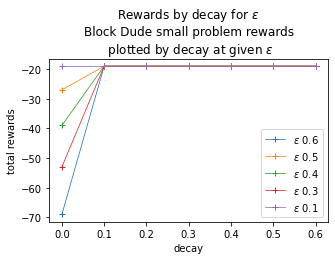

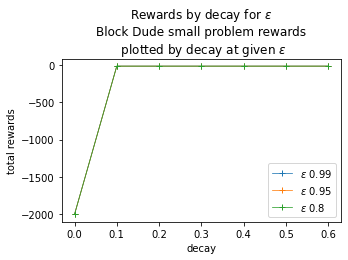

In [148]:
dConfig = reload_tracker()
bd_q = 'myq-bd'
bdq_exp_id = dConfig[bd_q]

print(f"RUN BD-Q ID: {bdq_exp_id}")



filename = 'q_sm_bd_ep_result.csv'
df_ep_decay = pd.read_csv(dir_bd%(bd_q+'-'+bdq_exp_id, filename)) 
plot_infos_ep = [ 0.60, 0.5, 0.4, 0.3, 0.1]
plot_infos_ep_2 = [ 0.99, 0.95, 0.8]
              

plot_best_episode_rewards(plot_infos_ep, df_ep_decay,"Block Dude small problem rewards\n plotted by decay at given $\epsilon$", bd_q+'r1', figsave=figsave_all)
plot_best_episode_rewards(plot_infos_ep_2, df_ep_decay,"Block Dude small problem rewards\n plotted by decay at given $\epsilon$", bd_q+'r2', figsave=figsave_all)



RUN ID: 27212121


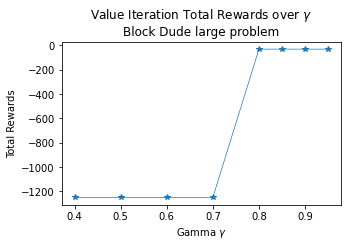

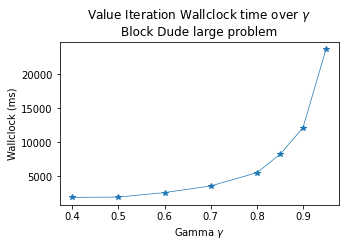

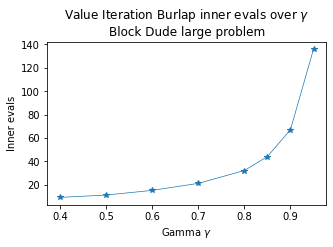

In [183]:
dConfig = reload_tracker()
bdname_lrg = 'mybdlrg'
bdlrg_exp_id = dConfig[bdname_lrg]
print(f"RUN ID: {bdlrg_exp_id}")

filename_vi = 'vi_lrg_bd_result.csv'
bd_vi_gamma_res_filename = dir_bd%(bdname_lrg+'-'+bdlrg_exp_id, filename_vi)
bd_vi_gamma_df = pd.read_csv(bd_vi_gamma_res_filename)
plot_vipi_gamma_results(bd_vi_gamma_df, "Block Dude large problem", bdname_lrg, 'vi', figsave_all)

RUN ID: 27233535


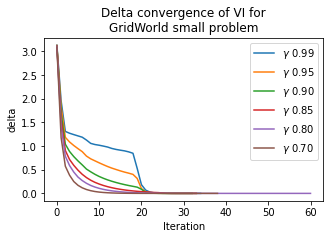

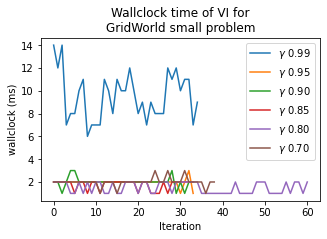

In [184]:
dConfig = reload_tracker()
gwname_sm = 'mygwsm'
gwsm_exp_id = dConfig[gwname_sm]
gammas = [0.99, 0.95, 0.90, 0.85, 0.8, 0.7]

print(f"RUN ID: {gwsm_exp_id}")

# outdir = dir_bd % (bdname_sm+'-'+bdsm_exp_id, 'vi_sm_bd_01-00.csv')
gwsm_dfs_vi = []
for gamma in gammas:
    filename = 'vi_sm_gw_%.2f-00.csv'%gamma
    gwsm_dfs_vi.append( (gamma,  pd.read_csv(dir_gw%(gwname_sm+'-'+gwsm_exp_id, filename)) ))
#     print(dir_bd%(bdname_sm+'-'+bdsm_exp_id, filename))

plot_vi(gwsm_dfs_vi, "GridWorld small problem", gwname_sm) 

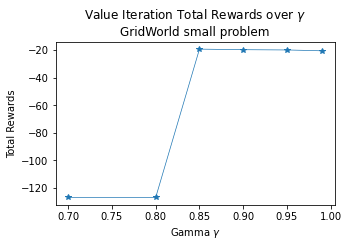

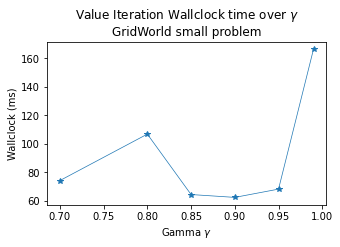

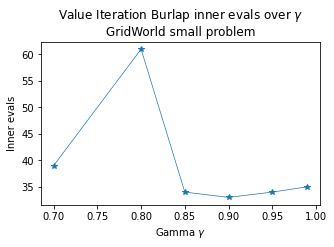

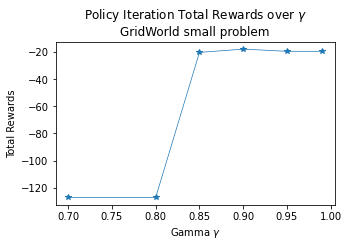

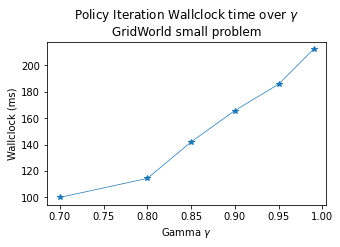

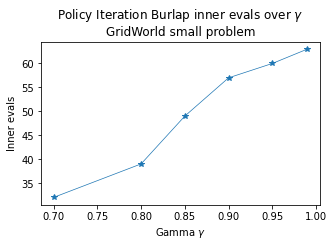

In [185]:
dConfig = reload_tracker()
gwname_sm = 'mygwsm'
gwsm_exp_id = dConfig[gwname_sm]
def merge_dfs_pivi_resutls_sm(alg='vi'):
    df_all = pd.DataFrame()
    for i in range(5):
        filename = f'{alg}_sm_gw_gamma_result-{i:02}.csv'
        fullfilename = dir_gw%(gwname_sm+'-'+gwsm_exp_id, filename)
#         print(fullfilename)
#         df_all['run'],df_all['wallclock'], df_all['totalRewards'], df_all['viEvals'] = 
        df_now = pd.read_csv(fullfilename)
#         print(df_now)
        if i ==0:
            df_all =df_now
        else:
            df_all = df_all + df_now
#         print(df_all.head())
    
    df_all = df_all / 5
    return df_all

merged_vi_gw_small = merge_dfs_pivi_resutls_sm('vi')
merged_pi_gw_small = merge_dfs_pivi_resutls_sm('pi')
plot_vipi_gamma_results(merged_vi_gw_small, "GridWorld small problem", gwname_sm, 'vi', figsave_all)
plot_vipi_gamma_results(merged_pi_gw_small, "GridWorld small problem", gwname_sm, 'pi', figsave_all)

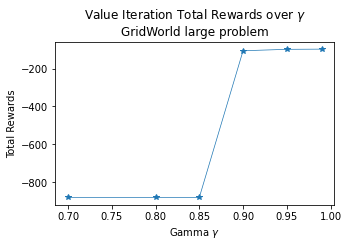

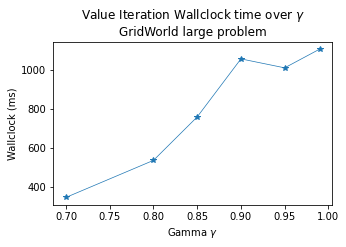

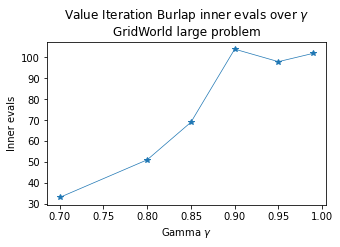

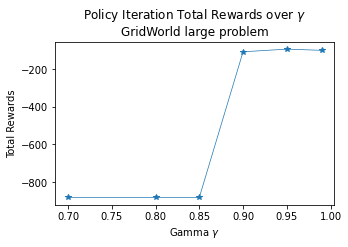

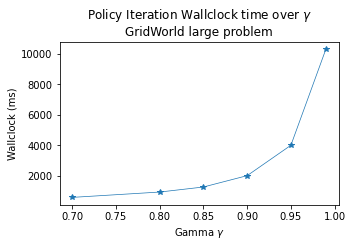

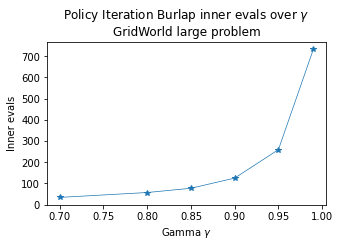

In [186]:
dConfig = reload_tracker()
gwname_lrg_gamma = 'mygwlrg-gamma'
gwlrg_exp_gamma_id = dConfig[gwname_lrg_gamma]

def merge_dfs_pivi_resutls_lrg(alg='vi'):
    df_all = pd.DataFrame()
    for i in range(5):
        filename = f'{alg}_lrg_gw_gamma_result-{i:02}.csv'
        fullfilename = dir_gw%(gwname_lrg_gamma+'-'+gwlrg_exp_gamma_id, filename)
#         print(fullfilename)
#         df_all['run'],df_all['wallclock'], df_all['totalRewards'], df_all['viEvals'] = 
        df_now = pd.read_csv(fullfilename)
#         print(df_now)
        if i ==0:
            df_all =df_now
        else:
            df_all = df_all + df_now
#         print(df_all.head())
    
    df_all = df_all / 5
    return df_all

merged_vi_gw_lrg = merge_dfs_pivi_resutls_lrg('vi')
merged_pi_gw_lrg= merge_dfs_pivi_resutls_lrg('pi')
plot_vipi_gamma_results(merged_vi_gw_lrg, "GridWorld large problem", gwname_lrg_gamma, 'vi', figsave_all)
plot_vipi_gamma_results(merged_pi_gw_lrg, "GridWorld large problem", gwname_lrg_gamma, 'pi', figsave_all)